In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stats = pd.read_csv("Seasons_stats_complete.csv")
salaries = pd.read_csv("NBA_Full_Salaries_2000-2019.csv")

In [3]:
stats.Year = stats.Year.astype(int)
stats.Player.str.replace('*', '')
stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950,Curly Armstrong,G-F,31.0,FTW,63.0,0.0,0.0,0.368,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,1,1950,Cliff Barker,SG,29.0,INO,49.0,0.0,0.0,0.435,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,2,1950,Leo Barnhorst,SF,25.0,CHS,67.0,0.0,0.0,0.394,...,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0
3,3,1950,Ed Bartels,F,24.0,TOT,15.0,0.0,0.0,0.312,...,0.559,0.0,0.0,0.0,20.0,0.0,0.0,0.0,29.0,63.0
4,4,1950,Ed Bartels,F,24.0,DNN,13.0,0.0,0.0,0.308,...,0.548,0.0,0.0,0.0,20.0,0.0,0.0,0.0,27.0,59.0


In [4]:
salaries.head(5)

,Unnamed: 0,Name,Year,Salaries,Rank
0,1,Shaquille O'Neal,2000,17142000.0,1
1,2,Kevin Garnett,2000,16806000.0,2
2,3,Alonzo Mourning,2000,15004000.0,3
3,4,Juwan Howard,2000,15000000.0,4
4,5,Scottie Pippen,2000,14795000.0,5


In [5]:
test = stats[stats.PER != 0]
test = test[test.MP != 0]

print(len(stats))
print(len(stats)-len(test))

26063
636


In [6]:
test.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
488,488,1952,Paul Arizin*,SF,23.0,PHW,66.0,2939.0,25.5,0.546,...,0.818,0.0,0.0,745.0,170.0,0.0,0.0,0.0,250.0,1674.0
489,489,1952,Cliff Barker,SG,31.0,INO,44.0,494.0,10.8,0.343,...,0.588,0.0,0.0,81.0,70.0,0.0,0.0,0.0,56.0,126.0
490,490,1952,Don Barksdale*,PF,28.0,BLB,62.0,2014.0,15.8,0.409,...,0.691,0.0,0.0,601.0,137.0,0.0,0.0,0.0,230.0,781.0
491,491,1952,Leo Barnhorst,SF,27.0,INO,66.0,2344.0,15.9,0.419,...,0.652,0.0,0.0,430.0,255.0,0.0,0.0,0.0,196.0,820.0
492,492,1952,Elmer Behnke,C,22.0,MLH,4.0,55.0,7.8,0.319,...,0.571,0.0,0.0,17.0,4.0,0.0,0.0,0.0,13.0,16.0


In [7]:
#test.iloc[0]

In [8]:
salaries.head()

,Unnamed: 0,Name,Year,Salaries,Rank
0,1,Shaquille O'Neal,2000,17142000.0,1
1,2,Kevin Garnett,2000,16806000.0,2
2,3,Alonzo Mourning,2000,15004000.0,3
3,4,Juwan Howard,2000,15000000.0,4
4,5,Scottie Pippen,2000,14795000.0,5


In [9]:
#salaries[salaries['Name'].str.match('Ivica Zubac')].dropna()
salariesdrop = salaries.dropna()
print(len(salaries))
print("Rows after deleting NaN rows: " + str(len(salaries)-len(salariesdrop)))
#salaries.head(200)

37420
Rows after deleting NaN rows: 28074


In [18]:
merged_inner = pd.merge(left=test, right=salariesdrop, left_on=["Player", "Year"], right_on=["Name", "Year"])
merged_inner=merged_inner.drop(['Name', "Unnamed: 0_y", "Unnamed: 0_x"], 1) #Removing unneccessary columns.
merged_inner_drop = merged_inner.drop_duplicates(subset='Player', keep='first') #Removing duplicates
print(merged_inner.shape)
merged_inner

(10221, 51)


,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salaries,Rank
0,2000,Ray Allen,SG,24.0,MIL,82.0,3070.0,20.6,0.570,0.288,...,276.0,359.0,308.0,110.0,19.0,183.0,187.0,1809.0,9000000.0,14
1,2000,Rafer Alston,PG,23.0,MIL,27.0,361.0,4.3,0.310,0.147,...,18.0,23.0,70.0,12.0,0.0,29.0,29.0,60.0,301000.0,144
2,2000,Kenny Anderson,PG,29.0,BOS,82.0,2593.0,17.4,0.524,0.223,...,170.0,225.0,420.0,139.0,8.0,130.0,230.0,1149.0,6680000.0,30
3,2000,Darrell Armstrong,PG,31.0,ORL,82.0,2590.0,19.5,0.542,0.360,...,205.0,270.0,501.0,169.0,9.0,248.0,137.0,1330.0,4125000.0,56
4,2000,Isaac Austin,C,30.0,WAS,59.0,1173.0,10.2,0.481,0.011,...,218.0,282.0,74.0,17.0,38.0,107.0,128.0,397.0,4819000.0,44
5,2000,Brent Barry,SG,28.0,SEA,80.0,2726.0,14.6,0.609,0.564,...,322.0,372.0,291.0,103.0,31.0,142.0,228.0,945.0,3960000.0,58
6,2000,Jonathan Bender,SF,19.0,IND,24.0,130.0,7.6,0.397,0.171,...,17.0,21.0,3.0,1.0,5.0,7.0,18.0,64.0,2214000.0,95
7,2000,Travis Best,PG,27.0,IND,82.0,1691.0,16.5,0.569,0.166,...,126.0,142.0,272.0,76.0,5.0,107.0,204.0,733.0,3250000.0,68
8,2000,Mike Bibby,PG,21.0,VAN,82.0,3155.0,16.7,0.521,0.206,...,233.0,306.0,665.0,132.0,15.0,247.0,171.0,1190.0,3092000.0,71
9,2000,Mookie Blaylock,PG,32.0,GSW,73.0,2459.0,15.1,0.468,0.360,...,215.0,270.0,489.0,146.0,22.0,143.0,122.0,822.0,4200000.0,53


In [11]:
salaries.head()

,Unnamed: 0,Name,Year,Salaries,Rank
0,1,Shaquille O'Neal,2000,17142000.0,1
1,2,Kevin Garnett,2000,16806000.0,2
2,3,Alonzo Mourning,2000,15004000.0,3
3,4,Juwan Howard,2000,15000000.0,4
4,5,Scottie Pippen,2000,14795000.0,5


In [12]:
salariesByYear = salaries.dropna().groupby("Year")

In [13]:
#salariesByYear.get_group(2017).sort_values(by=['Salaries'])

In [14]:
averageSalariesByYear = []
for year in range(2000, 2020):
    allSalaries = salariesByYear.get_group(year)
    salary = allSalaries["Salaries"].mean()
    averageSalariesByYear += [salary]

averageSalariesByYear
    

[4232652.777777778,
 3304928.989010989,
 3463517.4822222223,
 3702467.957871397,
 3684159.7621145374,
 3773687.5468085106,
 3961305.0480167014,
 3917887.234343434,
 4400600.818763326,
 4692347.6,
 4633963.24122807,
 4413547.226579521,
 4354507.706263499,
 4274055.674089069,
 4322503.510204081,
 4293242.994152047,
 4708117.084,
 5442310.904587156,
 5729243.1501706485,
 7010579.832358674]

In [15]:
#https://www.thebalance.com/u-s-inflation-rate-history-by-year-and-forecast-3306093

inflationRates = [3.4,1.6,2.4,1.9,3.3,3.4,2.5,4.1,0.1,2.7,1.5,3.0,1.7,1.5,0.8,0.7,2.1,2.1,1.9,1.5]

#Finding average yearly salaries grown by inflation

salariesByInflation = []
salariesByInflation += [averageSalariesByYear[0]]
for i in range(1,20):
    lastSalary = salariesByInflation[i-1]
    inflation = inflationRates[i]
    salariesByInflation += [lastSalary*(inflation/100+1)]

In [16]:
salariesByInflation

[4232652.777777778,
 4300375.222222223,
 4403584.227555556,
 4487252.327879111,
 4635331.654699122,
 4792932.930958892,
 4912756.254232864,
 5114179.260656411,
 5119293.439917067,
 5257514.362794828,
 5336377.078236749,
 5496468.390583852,
 5589908.353223777,
 5673756.978522133,
 5719147.03435031,
 5759181.063590762,
 5880123.865926168,
 6003606.467110617,
 6117674.989985718,
 6209440.1148355035]

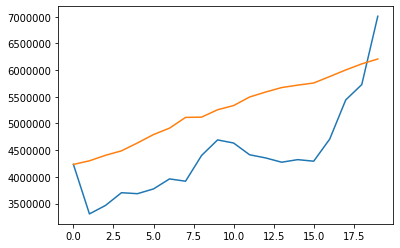

In [17]:
import matplotlib.pyplot as plt


plt.plot(averageSalariesByYear)
plt.plot(salariesByInflation)
plt.show()

In [50]:
print(merged_inner.columns)
merged_inner

data_dum = pd.get_dummies(columns=["Pos", "Tm"], data=merged_inner)
prediction_data = data_dum.drop(columns = ["Player"])
print(prediction_data)

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Salaries', 'Rank'],
      dtype='object')
       Year   Age     G      MP   PER    TS%   3PAr    FTr  ORB%  DRB%  ...  \
0      2000  24.0  82.0  3070.0  20.6  0.570  0.288  0.282   3.2  10.5  ...   
1      2000  23.0  27.0   361.0   4.3  0.310  0.147  0.042   1.6   5.8  ...   
2      2000  29.0  82.0  2593.0  17.4  0.524  0.223  0.257   2.3   7.9  ...   
3      2000  31.0  82.0  2590.0  19.5  0.542  0.360  0.221   2.7   8.6  ...   
4      2000  30.0  59.0  1173.0  10.2  0.481  0.011  0.389   6.2  21.7  ...   
5      2000  28.0  80.0  2726.0  14.6  0.609  0.564  0.222   2.0  13.1  ...   
6      200

In [51]:
from sklearn.model_selection import train_test_split
X = prediction_data.copy().drop(columns=["Salaries"])
y = prediction_data["Salaries"]

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# TODO
rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0).fit(X_train, y_train)

In [63]:
rayAllen = data_dum[data_dum["Player"] == "Ray Allen"]
rayAllen = rayAllen.drop(columns=["Player", "Salaries"])
rayAllen_pred = rf.predict(rayAllen)

In [68]:
print(data_dum[data_dum["Player"] == "Ray Allen"]["Salaries"])
rayAllen_pred

0        9000000.0
143     10130000.0
627     11250000.0
1076    12375000.0
1077    12375000.0
1078    12375000.0
1519    13500000.0
2042    14625000.0
2572    13223140.0
3090    14611570.0
3573    16000000.0
4133    18388430.0
4669    18776860.0
5213    10000000.0
5781    10000000.0
6277     3090000.0
6819     3229050.0
Name: Salaries, dtype: float64


array([ 3000000., 10130000.,  3000000.,  4000000.,  3000000.,  3000000.,
        4000000.,  4000000., 13223140.,  5000000.,  5000000.,  5000000.,
        5000000.,  5000000.,  5000000.,  3000000.,  3000000.])